# EDA For Mapping Vulnerabilities

Lets import our dependencies

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import folium as flm
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

And read in the dataset.

In [4]:
df = pd.read_csv('main.csv', index_col=None)
df

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,information_technology_capacity,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2017.0,0.0000,0.2120,2.5000,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.2976,0.4592,1.8750,0.0012,0.0039,2.5000,0.4161,0.0000,2.5000,0.0145,0.2879,0.0000,0.1943,1.5706,0.1104,0.0204,0.9949
1,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2018.0,0.0000,0.2337,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.1771,1.9907,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0197,0.0423,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0224,0.0072,0.0000,0.0000,0.0218,0.0000,0.0047,0.0000,0.0000,0.1253,0.0000,0.0000,0.0000,0.0000
2,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2019.0,0.0000,0.0000,2.2500,2.1047,0.2189,0.0614,0.1451,0.0074,1.9499,2.2000,1.9655,0.9127,2.4537,2.3204,2.5000,0.1300,0.4984,0.0401,0.0000,0.1339,0.0671,2.3451,0.0689,0.0806,0.3137,2.4231,0.0024,0.0051,2.5000,0.0012,0.0007,2.5000,0.0004,0.0595,0.1006,0.2553,1.4921,0.0007,0.0029,1.8558
3,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2020.0,0.0000,0.1653,2.5000,2.3125,0.0852,0.0587,0.0488,0.0083,2.2404,2.4242,2.2798,0.3017,2.5000,2.4933,2.5000,0.1185,0.5004,0.0385,0.0651,0.1390,0.0631,2.3385,0.0830,0.2679,0.1665,2.5000,0.1419,0.0013,2.5000,0.0072,0.0216,0.6250,0.0413,0.0023,0.0006,0.1643,0.9946,0.0024,0.0026,1.8706
4,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2021.0,0.0000,0.2606,1.2542,2.2948,0.0215,0.1064,0.0145,0.0061,2.1365,2.2619,2.3654,1.6250,2.4737,2.3721,1.2537,0.0835,0.0531,0.0060,0.1052,0.1231,0.0436,1.8169,0.0816,0.0909,0.0220,2.4545,0.0045,0.0067,2.5000,0.0283,0.1089,1.8750,0.0690,0.0000,0.1846,0.1683,1.2502,0.1047,0.0030,1.2478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11.639055,"11.6390554, 124.8415308",MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,Zumarraga,2018.0,0.0000,0.0004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8120,1.0185,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9800,806023000,Zumarraga,Zumarraga,Samar,"zumarrag

In [5]:
df.shape

(9804, 52)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
# df = gpd.GeoDataFrame(df, geometry=df['geometry'])
# type(df)

Lets check for **data types** and **Null** values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9804 non-null   int64  
 1   name                                                 9804 non-null   object 
 2   city_munic                                           9804 non-null   object 
 3   province                                             9804 non-null   object 
 4   clean_idx                                            9804 non-null   object 
 5   longitude                                            9804 non-null   float64
 6   latitude                                             9804 non-null   float64
 7   coords                                               9804 non-null   object 
 8   geometry                                             9756 non-null  

We have a number of missing values and data type discrepancies.  
  
Lets start with checking the missing values.

In [9]:
null_rows = df[df['geometry'].isnull()]
null_rows['name'].unique()

array(['Datu Hoffer Ampatuan', 'Datu Salibo', 'Hadji Muhtamad', 'Igacos',
       'Kalayaan (PN)', 'Omar', 'Shariff Saydona Mustapha', 'Tabuan-Lasa'],
      dtype=object)

We have 8 cities missing geometry files.  
  
Lets fill these with 'Not Available' to indicate it has missing geometry.

In [10]:
df['geometry'].fillna('Not Available', inplace=True)

A quick check we have resolved this.

In [11]:
null_rows = df[df['geometry'].isnull()]
null_rows

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,information_technology_capacity,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities


In [12]:
null_rows2 = df[df['city_municipality'].isnull()]
null_rows2['name'].unique()

array(["Brooke's Point", "T'Boli"], dtype=object)

We have two cities with missing information.  
  
Let's use **'name'** to fill the missing **'city_municipality'** data.

In [13]:
df['city_municipality'].fillna(df['name'], inplace=True)

In [14]:
null_rows = df[df['city_municipality'].isnull()]
null_rows

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,information_technology_capacity,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities


In [15]:
rows = df[df['name'] == "Brooke's Point"]
rows

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,information_technology_capacity,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
1458,1705306000,Brooke's Point,Brooke'S Point,Palawan,"brookespoint, palawan",117.838979,8.773602,"8.7736019, 117.8389787",POLYGON ((117.81459045400015 9.019559860000186...,243,Brooke's Point,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,1705306000,Brooke's Point,Brooke'S Point,Palawan,"brookespoint, palawan",117.838979,8.773602,"8.7736019, 117.8389787",POLYGON ((117.81459045400015 9.019559860000186...,243,Brooke's Point,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,1705306000,Brooke's Point,Brooke'S Point,Palawan,"brookespoint, palawan",117.838979,8.773602,"8.7736019, 117.8389787",POLYGON ((117.81459045400015 9.019559860000186...,243,Brooke's Point,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,1705306000,Brooke's Point,Brooke'S Point,Palawan,"brookespoint, palawan",117.838979,8.773602,"8.7736019, 117.8389787",POLYGON ((117.81459045400015 9.019559860000186...,243,Brooke's Point,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,1705306000,Brooke's Point,Brooke'S Point,Palawan,"brookespoint, palawan",117.838979,8.773602,"8.7736019, 117.8389787",POLYGON ((117.81459045400015 9.019559860000186...,243,Brooke's Point,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1463,1705306000,Brooke's Point,Brooke'S Point,Palawan,"brookespoint, palawan",117.838979,8.773602,"8.7736019, 117.8389787",POLYGON ((117.81459045400015 9.019559860000186...,243,Brooke's Point,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
rows = df[df['name'] == "T'Boli"]
rows

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,information_technology_capacity,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
9252,1206316000,T'Boli,T'Boli,South Cotabato,"tboli, southcotabato",124.822925,6.213832,"6.2138317, 124.8229251",POLYGON ((124.79447937000009 6.241089821000116...,1542,T'Boli,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9253,1206316000,T'Boli,T'Boli,South Cotabato,"tboli, southcotabato",124.822925,6.213832,"6.2138317, 124.8229251",POLYGON ((124.79447937000009 6.241089821000116...,1542,T'Boli,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9254,1206316000,T'Boli,T'Boli,South Cotabato,"tboli, southcotabato",124.822925,6.213832,"6.2138317, 124.8229251",POLYGON ((124.79447937000009 6.241089821000116...,1542,T'Boli,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9255,1206316000,T'Boli,T'Boli,South Cotabato,"tboli, southcotabato",124.822925,6.213832,"6.2138317, 124.8229251",POLYGON ((124.79447937000009 6.241089821000116...,1542,T'Boli,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9256,1206316000,T'Boli,T'Boli,South Cotabato,"tboli, southcotabato",124.822925,6.213832,"6.2138317, 124.8229251",POLYGON ((124.79447937000009 6.241089821000116...,1542,T'Boli,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9257,1206316000,T'Boli,T'Boli,South Cotabato,"tboli, southcotabato",124.822925,6.213832,"6.2138317, 124.8229251",POLYGON ((124.79447937000009 6.241089821000116...,1542,T'Boli,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['city_municipality'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9804 entries, 0 to 9803
Series name: city_municipality
Non-Null Count  Dtype 
--------------  ----- 
9804 non-null   object
dtypes: object(1)
memory usage: 76.7+ KB


We know we have lots of zeros, so lets count them. First we need to change the columns from **object** to **float**.  
  
The conversion to **floats** failed due to there being **'-'** in the columns.  
  
Lets see where they are and how many.

In [18]:
dash_by_column = (df == '-').sum() / 100
dash_by_column

psgc                                                   0.00
name                                                   0.00
city_munic                                             0.00
province                                               0.00
clean_idx                                              0.00
longitude                                              0.00
latitude                                               0.00
coords                                                 0.00
geometry                                               0.00
FID                                                    0.00
city_municipality                                      0.00
year                                                   0.00
accommodation_capacity                                 5.40
active_establishments_in_the_locality                  5.51
annual_disaster_drill                                  5.40
availability_of_basic_utilities                        5.40
budget_for_drrmp                        

We can see that they are all in the DTi features.  
  
Lets convert the '-' to 0.000 to match the other missing values.

In [19]:
df.replace('-', 0.0000, inplace=True)

Lets convert the DTi columns to `float`.

In [20]:
df[df.columns[12:51]] = df[df.columns[12:51]].astype(float)

And the years to `int`.

In [21]:
df['year'] = df['year'].astype(int)

Lets have a count of the zero's.

In [22]:
zeros_by_column = df.eq(0).sum()
zeros_by_column

psgc                                                      0
name                                                      0
city_munic                                                0
province                                                  0
clean_idx                                                 0
longitude                                                 0
latitude                                                  0
coords                                                    0
geometry                                                  0
FID                                                       6
city_municipality                                         0
year                                                      0
accommodation_capacity                                 5621
active_establishments_in_the_locality                  1481
annual_disaster_drill                                  2628
availability_of_basic_utilities                        2203
budget_for_drrmp                        

Lets convert all the zero's to **Null Values**.

In [23]:
df.loc[:,df.columns[12:52]] = df.loc[:,df.columns[12:52]].replace(0, np.nan)

And check the result.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9804 non-null   int64  
 1   name                                                 9804 non-null   object 
 2   city_munic                                           9804 non-null   object 
 3   province                                             9804 non-null   object 
 4   clean_idx                                            9804 non-null   object 
 5   longitude                                            9804 non-null   float64
 6   latitude                                             9804 non-null   float64
 7   coords                                               9804 non-null   object 
 8   geometry                                             9804 non-null  

In [25]:
df2 = df.fillna(method='ffill').fillna(method='bfill')

In [26]:
df2

,psgc,name,city_munic,province,clean_idx,longitude,latitude,coords,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,information_technology_capacity,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2017,0.0072,0.2120,2.5000,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.2976,0.4592,1.8750,0.0012,0.0039,2.5,0.4161,0.0218,2.5000,0.0145,0.2879,0.1006,0.1943,1.5706,0.1104,0.0204,0.9949
1,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2018,0.0072,0.2337,2.5000,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.1771,1.9907,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0197,0.0423,0.0463,0.7434,0.0623,0.2976,0.4592,1.8750,0.0224,0.0072,2.5,0.4161,0.0218,2.5000,0.0047,0.2879,0.1006,0.1253,1.5706,0.1104,0.0204,0.0000
2,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2019,0.0072,0.2337,2.2500,2.1047,0.2189,0.0614,0.1451,0.0074,1.9499,2.2000,1.9655,0.9127,2.4537,2.3204,2.5000,0.1300,0.4984,0.0401,0.0197,0.1339,0.0671,2.3451,0.0689,0.0806,0.3137,2.4231,0.0024,0.0051,2.5,0.0012,0.0007,2.5000,0.0004,0.0595,0.1006,0.2553,1.4921,0.0007,0.0029,1.8558
3,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2020,0.0072,0.1653,2.5000,2.3125,0.0852,0.0587,0.0488,0.0083,2.2404,2.4242,2.2798,0.3017,2.5000,2.4933,2.5000,0.1185,0.5004,0.0385,0.0651,0.1390,0.0631,2.3385,0.0830,0.2679,0.1665,2.5000,0.1419,0.0013,2.5,0.0072,0.0216,0.6250,0.0413,0.0023,0.0006,0.1643,0.9946,0.0024,0.0026,1.8706
4,1705301000,Aborlan,Aborlan,Palawan,"aborlan, palawan",118.548417,9.437101,"9.4371009, 118.5484168",MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2021,0.0072,0.2606,1.2542,2.2948,0.0215,0.1064,0.0145,0.0061,2.1365,2.2619,2.3654,1.6250,2.4737,2.3721,1.2537,0.0835,0.0531,0.0060,0.1052,0.1231,0.0436,1.8169,0.0816,0.0909,0.0220,2.4545,0.0045,0.0067,2.5,0.0283,0.1089,1.8750,0.0690,0.0023,0.1846,0.1683,1.2502,0.1047,0.0030,1.2478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11.639055,"11.6390554, 124.8415308",MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,Zumarraga,2018,0.0123,0.0004,2.5000,1.4063,0.0021,0.0930,0.3131,0.7237,1.8189,2.3684,0.8120,1.0185,2.0000,1.5545,2.5000,0.1107,0.8730,0.0907,0.0073,0.1410,0.0909,1.4186,0.0864,0.3770,0.1720,1.2500,0.0010,0.0038,2.5,0.3350,0.0095,1.9984,0.1837,0.3131,0.0008,0.0569,1.5864,0.3079,0.0044,0.0000
9800,806023000,Zumarraga,Zumarraga,Samar,"zumarraga, samar",124.841531,11.639055

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9804 entries, 0 to 9803
Data columns (total 52 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   psgc                                                 9804 non-null   int64  
 1   name                                                 9804 non-null   object 
 2   city_munic                                           9804 non-null   object 
 3   province                                             9804 non-null   object 
 4   clean_idx                                            9804 non-null   object 
 5   longitude                                            9804 non-null   float64
 6   latitude                                             9804 non-null   float64
 7   coords                                               9804 non-null   object 
 8   geometry                                             9804 non-null  

Lets remove some of the columns that are of no use.

In [28]:
col_list = ['psgc', 'city_munic', 'clean_idx', 'coords']
df2.drop(columns = col_list, inplace = True)
df2.head(8)

,name,province,longitude,latitude,geometry,FID,city_municipality,year,accommodation_capacity,active_establishments_in_the_locality,annual_disaster_drill,availability_of_basic_utilities,budget_for_drrmp,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,cost_of_doing_business,cost_of_living,disaster_risk_reduction_plan,distance_to_ports,early_warning_system,education,emergency_infrastructure,employed_population,employment_generation,financial_deepening,financial_technology_capacity,getting_business_permits,health,information_technology_capacity,lgu_investment,land_use_plan,local_economy_growth,local_economy_size,local_risk_assessments,peace_and_order,presence_of_business_and_professional_organizations,presence_of_investment_promotion_unit,productivity,recognition_of_performance,road_network,safety_compliant_business,sanitary_system,social_protection,transportation_vehicles,utilities
0,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2017,0.0072,0.2120,2.5000,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.2277,1.5203,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0218,0.1894,0.0463,0.7434,0.0623,0.2976,0.4592,1.8750,0.0012,0.0039,2.5,0.4161,0.0218,2.5000,0.0145,0.2879,0.1006,0.1943,1.5706,0.1104,0.0204,0.9949
1,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2018,0.0072,0.2337,2.5000,2.5000,0.0017,0.1098,0.2879,1.4320,2.2597,2.3718,2.1771,1.9907,2.5000,2.1655,2.5000,0.0997,0.8750,0.0457,0.0197,0.0423,0.0463,0.7434,0.0623,0.2976,0.4592,1.8750,0.0224,0.0072,2.5,0.4161,0.0218,2.5000,0.0047,0.2879,0.1006,0.1253,1.5706,0.1104,0.0204,0.0000
2,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2019,0.0072,0.2337,2.2500,2.1047,0.2189,0.0614,0.1451,0.0074,1.9499,2.2000,1.9655,0.9127,2.4537,2.3204,2.5000,0.1300,0.4984,0.0401,0.0197,0.1339,0.0671,2.3451,0.0689,0.0806,0.3137,2.4231,0.0024,0.0051,2.5,0.0012,0.0007,2.5000,0.0004,0.0595,0.1006,0.2553,1.4921,0.0007,0.0029,1.8558
3,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2020,0.0072,0.1653,2.5000,2.3125,0.0852,0.0587,0.0488,0.0083,2.2404,2.4242,2.2798,0.3017,2.5000,2.4933,2.5000,0.1185,0.5004,0.0385,0.0651,0.1390,0.0631,2.3385,0.0830,0.2679,0.1665,2.5000,0.1419,0.0013,2.5,0.0072,0.0216,0.6250,0.0413,0.0023,0.0006,0.1643,0.9946,0.0024,0.0026,1.8706
4,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2021,0.0072,0.2606,1.2542,2.2948,0.0215,0.1064,0.0145,0.0061,2.1365,2.2619,2.3654,1.6250,2.4737,2.3721,1.2537,0.0835,0.0531,0.0060,0.1052,0.1231,0.0436,1.8169,0.0816,0.0909,0.0220,2.4545,0.0045,0.0067,2.5,0.0283,0.1089,1.8750,0.0690,0.0023,0.1846,0.1683,1.2502,0.1047,0.0030,1.2478
5,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,Aborlan,2022,0.0072,0.0662,1.0020,0.0945,0.0215,0.0019,0.0022,0.0028,2.0000,1.8214,1.9004,1.9279,1.9998,1.8963,1.0087,0.0749,0.0292,0.0061,0.0624,0.0793,0.0172,1.5000,0.0978,0.0176,0.0012,1.9848,0.0001,0.0105,2.0,0.0644,0.0117,1.6667,0.0341,0.0023,0.0001,0.1683,1.0002,0.0014,0.0032,1.5007
6,Abra De Ilog,Occidental Mindoro,120.726826,13.443721,POLYGON ((120.60896301200034 13.35233020800012...,1,Abra De Ilog,2017,0.0072,0.0479,2.5000,2.5000,0.0022,0.0748,0.1469,0.0483,1.9519,1.8214,2.2561,1.9257,2.5000,1.9287,2.5000,0.0518,0.8837,0.1280,0.0042,0.1263,0.0172,2.2085,0.0322,0.1915,0.3825,2.5000,0.0109,0.0089,2.5,0.4144,0.0860,1.6667,0.0278,0.1469,0.0002,0.0369,1.0235,0.0947,0.0476,1.0076
7,Abra De Ilog,Occidental Mindoro,120.726826,13.443721,POLYGON ((120.60896301200034 13.35233020800012...,1,Abra De Ilog,2018,0.0072,0.0477,2.5000,2.5000,0.0022,0.0748,0.1469,0.0483,1.9519,1.8214,2.2200,2.3611,2.5000,1.9287,2.5000,0.0518,0.8837,0.1280,0.0008,0.0184,0.0172,2.2085,0.0322,0.1915,0.3825,2.5000,0.010

In [29]:
df2.shape

(9804, 48)

In [30]:
df2.columns.to_list()

['name',
 'province',
 'longitude',
 'latitude',
 'geometry',
 'FID',
 'city_municipality',
 'year',
 'accommodation_capacity',
 'active_establishments_in_the_locality',
 'annual_disaster_drill',
 'availability_of_basic_utilities',
 'budget_for_drrmp',
 'capacity_of_health_services',
 'capacity_of_school_services',
 'capacity_to_generate_local_resource',
 'compliance_to_arta_citizens_charter',
 'compliance_to_national_directives',
 'cost_of_doing_business',
 'cost_of_living',
 'disaster_risk_reduction_plan',
 'distance_to_ports',
 'early_warning_system',
 'education',
 'emergency_infrastructure',
 'employed_population',
 'employment_generation',
 'financial_deepening',
 'financial_technology_capacity',
 'getting_business_permits',
 'health',
 'information_technology_capacity',
 'lgu_investment',
 'land_use_plan',
 'local_economy_growth',
 'local_economy_size',
 'local_risk_assessments',
 'peace_and_order',
 'presence_of_business_and_professional_organizations',
 'presence_of_investment

In [31]:
cols = [
    'city_municipality','province', 'longitude', 'latitude', 'geometry',
	 'FID', 'year', 'active_establishments_in_the_locality',
 	'cost_of_doing_business',
    'cost_of_living', 'employment_generation', 'financial_deepening',
	'local_economy_growth', 'local_economy_size',
	'presence_of_business_and_professional_organizations', 'productivity',
	'safety_compliant_business',
	'capacity_of_health_services', 'capacity_of_school_services',
	'capacity_to_generate_local_resource',
	'compliance_to_arta_citizens_charter',
	'compliance_to_national_directives', 'getting_business_permits',
	'peace_and_order', 'presence_of_investment_promotion_unit',
	'recognition_of_performance', 'social_protection',
	'annual_disaster_drill', 'budget_for_drrmp',
	'disaster_risk_reduction_plan', 'early_warning_system',
	'emergency_infrastructure', 'employed_population', 'land_use_plan',
	'local_risk_assessments', 'sanitary_system', 'utilities',
    'accommodation_capacity', 'availability_of_basic_utilities',
	'distance_to_ports', 'education', 'financial_technology_capacity',
	'health', 'information_technology_capacity', 'lgu_investment',
	'road_network', 'transportation_vehicles' ]

In [32]:
df2 = df2[cols]
df2

,city_municipality,province,longitude,latitude,geometry,FID,year,active_establishments_in_the_locality,cost_of_doing_business,cost_of_living,employment_generation,financial_deepening,local_economy_growth,local_economy_size,presence_of_business_and_professional_organizations,productivity,safety_compliant_business,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,getting_business_permits,peace_and_order,presence_of_investment_promotion_unit,recognition_of_performance,social_protection,annual_disaster_drill,budget_for_drrmp,disaster_risk_reduction_plan,early_warning_system,emergency_infrastructure,employed_population,land_use_plan,local_risk_assessments,sanitary_system,utilities,accommodation_capacity,availability_of_basic_utilities,distance_to_ports,education,financial_technology_capacity,health,information_technology_capacity,lgu_investment,road_network,transportation_vehicles
0,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2017,0.2120,2.2277,1.5203,0.0218,0.1894,0.0012,0.0039,0.0218,0.0145,0.1943,0.1098,0.2879,1.4320,2.2597,2.3718,0.7434,0.4161,2.5000,0.2879,0.1104,2.5000,0.0017,2.5000,2.5000,0.8750,0.0457,1.8750,2.5,1.5706,0.9949,0.0072,2.5000,2.1655,0.0997,0.0463,0.0623,0.2976,0.4592,0.1006,0.0204
1,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2018,0.2337,2.1771,1.9907,0.0197,0.0423,0.0224,0.0072,0.0218,0.0047,0.1253,0.1098,0.2879,1.4320,2.2597,2.3718,0.7434,0.4161,2.5000,0.2879,0.1104,2.5000,0.0017,2.5000,2.5000,0.8750,0.0457,1.8750,2.5,1.5706,0.0000,0.0072,2.5000,2.1655,0.0997,0.0463,0.0623,0.2976,0.4592,0.1006,0.0204
2,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2019,0.2337,1.9655,0.9127,0.0197,0.1339,0.0024,0.0051,0.0007,0.0004,0.2553,0.0614,0.1451,0.0074,1.9499,2.2000,2.3451,0.0012,2.5000,0.0595,0.0007,2.2500,0.2189,2.4537,2.5000,0.4984,0.0401,2.4231,2.5,1.4921,1.8558,0.0072,2.1047,2.3204,0.1300,0.0671,0.0689,0.0806,0.3137,0.1006,0.0029
3,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2020,0.1653,2.2798,0.3017,0.0651,0.1390,0.1419,0.0013,0.0216,0.0413,0.1643,0.0587,0.0488,0.0083,2.2404,2.4242,2.3385,0.0072,0.6250,0.0023,0.0024,2.5000,0.0852,2.5000,2.5000,0.5004,0.0385,2.5000,2.5,0.9946,1.8706,0.0072,2.3125,2.4933,0.1185,0.0631,0.0830,0.2679,0.1665,0.0006,0.0026
4,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2021,0.2606,2.3654,1.6250,0.1052,0.1231,0.0045,0.0067,0.1089,0.0690,0.1683,0.1064,0.0145,0.0061,2.1365,2.2619,1.8169,0.0283,1.8750,0.0023,0.1047,1.2542,0.0215,2.4737,1.2537,0.0531,0.0060,2.4545,2.5,1.2502,1.2478,0.0072,2.2948,2.3721,0.0835,0.0436,0.0816,0.0909,0.0220,0.1846,0.0030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2018,0.0004,0.8120,1.0185,0.0073,0.1410,0.0010,0.0038,0.0095,0.1837,0.0569,0.0930,0.3131,0.7237,1.8189,2.3684,1.4186,0.3350,1.9984,0.3131,0.3079,2.5000,0.0021,2.0000,2.5000,0.8730,0.0907,1.2500,2.5,1.5864,0.0000,0.0123,1.4063,1.5545,0.1107,0.0909,0.0864,0.3770,0.1720,0.0008,0.0044
9800,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2019,0.0093,1.4285,1.0000,0.0060,0.1410,0.0010,0.0038,0.0095,0.0033,0.0569,0.0324,0.2339,0.7070,2.3612,2.4994,1.5524,0.1843,1.9984,0.3131,0.7160,2.4107,0.0632,2.4537,2.5000,0.4590,0.0073,2.0000,2.5,1.0144,1.8799,0.0104,1.4719,2.4148,0.0473,0.0909,0.0277,0.2097,0.0435,0.0202,0.0014
9801,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2020,1.0019,1.5196,1.6803,0.0385,0.0174,0.0090,0.0038,0.0027,0.0298,0.0569,0.1629,0.1926,0.3

In [33]:
df3 = df2.copy()
df3

,city_municipality,province,longitude,latitude,geometry,FID,year,active_establishments_in_the_locality,cost_of_doing_business,cost_of_living,employment_generation,financial_deepening,local_economy_growth,local_economy_size,presence_of_business_and_professional_organizations,productivity,safety_compliant_business,capacity_of_health_services,capacity_of_school_services,capacity_to_generate_local_resource,compliance_to_arta_citizens_charter,compliance_to_national_directives,getting_business_permits,peace_and_order,presence_of_investment_promotion_unit,recognition_of_performance,social_protection,annual_disaster_drill,budget_for_drrmp,disaster_risk_reduction_plan,early_warning_system,emergency_infrastructure,employed_population,land_use_plan,local_risk_assessments,sanitary_system,utilities,accommodation_capacity,availability_of_basic_utilities,distance_to_ports,education,financial_technology_capacity,health,information_technology_capacity,lgu_investment,road_network,transportation_vehicles
0,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2017,0.2120,2.2277,1.5203,0.0218,0.1894,0.0012,0.0039,0.0218,0.0145,0.1943,0.1098,0.2879,1.4320,2.2597,2.3718,0.7434,0.4161,2.5000,0.2879,0.1104,2.5000,0.0017,2.5000,2.5000,0.8750,0.0457,1.8750,2.5,1.5706,0.9949,0.0072,2.5000,2.1655,0.0997,0.0463,0.0623,0.2976,0.4592,0.1006,0.0204
1,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2018,0.2337,2.1771,1.9907,0.0197,0.0423,0.0224,0.0072,0.0218,0.0047,0.1253,0.1098,0.2879,1.4320,2.2597,2.3718,0.7434,0.4161,2.5000,0.2879,0.1104,2.5000,0.0017,2.5000,2.5000,0.8750,0.0457,1.8750,2.5,1.5706,0.0000,0.0072,2.5000,2.1655,0.0997,0.0463,0.0623,0.2976,0.4592,0.1006,0.0204
2,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2019,0.2337,1.9655,0.9127,0.0197,0.1339,0.0024,0.0051,0.0007,0.0004,0.2553,0.0614,0.1451,0.0074,1.9499,2.2000,2.3451,0.0012,2.5000,0.0595,0.0007,2.2500,0.2189,2.4537,2.5000,0.4984,0.0401,2.4231,2.5,1.4921,1.8558,0.0072,2.1047,2.3204,0.1300,0.0671,0.0689,0.0806,0.3137,0.1006,0.0029
3,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2020,0.1653,2.2798,0.3017,0.0651,0.1390,0.1419,0.0013,0.0216,0.0413,0.1643,0.0587,0.0488,0.0083,2.2404,2.4242,2.3385,0.0072,0.6250,0.0023,0.0024,2.5000,0.0852,2.5000,2.5000,0.5004,0.0385,2.5000,2.5,0.9946,1.8706,0.0072,2.3125,2.4933,0.1185,0.0631,0.0830,0.2679,0.1665,0.0006,0.0026
4,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2021,0.2606,2.3654,1.6250,0.1052,0.1231,0.0045,0.0067,0.1089,0.0690,0.1683,0.1064,0.0145,0.0061,2.1365,2.2619,1.8169,0.0283,1.8750,0.0023,0.1047,1.2542,0.0215,2.4737,1.2537,0.0531,0.0060,2.4545,2.5,1.2502,1.2478,0.0072,2.2948,2.3721,0.0835,0.0436,0.0816,0.0909,0.0220,0.1846,0.0030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2018,0.0004,0.8120,1.0185,0.0073,0.1410,0.0010,0.0038,0.0095,0.1837,0.0569,0.0930,0.3131,0.7237,1.8189,2.3684,1.4186,0.3350,1.9984,0.3131,0.3079,2.5000,0.0021,2.0000,2.5000,0.8730,0.0907,1.2500,2.5,1.5864,0.0000,0.0123,1.4063,1.5545,0.1107,0.0909,0.0864,0.3770,0.1720,0.0008,0.0044
9800,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2019,0.0093,1.4285,1.0000,0.0060,0.1410,0.0010,0.0038,0.0095,0.0033,0.0569,0.0324,0.2339,0.7070,2.3612,2.4994,1.5524,0.1843,1.9984,0.3131,0.7160,2.4107,0.0632,2.4537,2.5000,0.4590,0.0073,2.0000,2.5,1.0144,1.8799,0.0104,1.4719,2.4148,0.0473,0.0909,0.0277,0.2097,0.0435,0.0202,0.0014
9801,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2020,1.0019,1.5196,1.6803,0.0385,0.0174,0.0090,0.0038,0.0027,0.0298,0.0569,0.1629,0.1926,0.3

In [34]:
print(df3.columns[[9, 18, 19, 26, 27, 34, 35, 38, 40, 43]])

Index(['cost_of_living', 'capacity_of_school_services',
       'capacity_to_generate_local_resource', 'social_protection',
       'annual_disaster_drill', 'local_risk_assessments', 'sanitary_system',
       'availability_of_basic_utilities', 'education',
       'information_technology_capacity'],
      dtype='object')


In [35]:
print(df3.columns[[8, 11, 21, 23, 28, 30, 31, 32, 42, 46]])

Index(['cost_of_doing_business', 'financial_deepening',
       'compliance_to_national_directives', 'peace_and_order',
       'budget_for_drrmp', 'early_warning_system', 'emergency_infrastructure',
       'employed_population', 'health', 'transportation_vehicles'],
      dtype='object')


# PCA - MEAN

In [36]:
columns = df3.columns.to_list()

In [37]:
columns_to_use = ['active_establishments_in_the_locality', 'cost_of_doing_business',
       'cost_of_living', 'employment_generation', 'financial_deepening',
       'local_economy_growth', 'local_economy_size',
       'presence_of_business_and_professional_organizations', 'productivity',
       'safety_compliant_business','capacity_of_health_services', 'capacity_of_school_services',
       'capacity_to_generate_local_resource',
       'compliance_to_arta_citizens_charter',
       'compliance_to_national_directives', 'getting_business_permits',
       'peace_and_order', 'presence_of_investment_promotion_unit',
       'recognition_of_performance', 'social_protection', 'accommodation_capacity', 'availability_of_basic_utilities',
       'distance_to_ports', 'education', 'financial_technology_capacity',
       'health', 'information_technology_capacity', 'lgu_investment',
       'road_network', 'transportation_vehicles', 'annual_disaster_drill', 'budget_for_drrmp',
       'disaster_risk_reduction_plan', 'early_warning_system',
       'emergency_infrastructure', 'employed_population', 'land_use_plan',
       'local_risk_assessments', 'sanitary_system', 'utilities']

In [38]:
data = df3[columns_to_use]
columns_names = columns

In [39]:
pca = PCA(n_components=4)
pca.fit(data)
reduced_data = pca.transform(data)

In [40]:
economic_dynamism = ['active_establishments_in_the_locality', 'cost_of_doing_business',
       'cost_of_living', 'employment_generation', 'financial_deepening',
       'local_economy_growth', 'local_economy_size',
       'presence_of_business_and_professional_organizations', 'productivity',
       'safety_compliant_business']
government_efficiency = ['capacity_of_health_services', 'capacity_of_school_services',
       'capacity_to_generate_local_resource',
       'compliance_to_arta_citizens_charter',
       'compliance_to_national_directives', 'getting_business_permits',
       'peace_and_order', 'presence_of_investment_promotion_unit',
       'recognition_of_performance', 'social_protection']
infrastructure = ['accommodation_capacity', 'availability_of_basic_utilities',
       'distance_to_ports', 'education', 'financial_technology_capacity',
       'health', 'information_technology_capacity', 'lgu_investment',
       'road_network', 'transportation_vehicles']
resiliency = ['annual_disaster_drill', 'budget_for_drrmp',
       'disaster_risk_reduction_plan', 'early_warning_system',
       'emergency_infrastructure', 'employed_population', 'land_use_plan',
       'local_risk_assessments', 'sanitary_system', 'utilities']

In [41]:
grouped_data = []
grouped_data.append(df3[economic_dynamism])
grouped_data.append(df3[government_efficiency])
grouped_data.append(df3[infrastructure])
grouped_data.append(df3[resiliency])

In [42]:
indexed_data = []
for group in grouped_data:
    indexed_data.append(np.mean(group, axis=1))

In [43]:
final_data = np.hstack((np.array(indexed_data).T, reduced_data))

In [44]:
column_names = ['economic_dynamism',
 'government_efficiency',
 'infrastructure',
 'resiliency',
 'PCA1',
 'PCA2',
 'PCA3',
 'PCA4',]

In [45]:
df4 = pd.DataFrame(final_data, columns=column_names)
df4

,economic_dynamism,government_efficiency,infrastructure,resiliency,PCA1,PCA2,PCA3,PCA4
0,0.44069,1.05190,0.57588,1.596444,1.183885,-0.702233,0.008138,-0.053779
1,0.46449,1.05190,0.57588,1.596444,1.121445,-1.398843,0.432352,-0.070485
2,0.35294,0.92703,0.51961,1.597367,0.918143,0.633891,-0.686267,-0.514495
3,0.33213,0.77558,0.55152,1.568744,1.057118,-0.085097,-1.271873,-0.802375
4,0.48367,0.83526,0.51833,1.251878,-0.185516,0.314865,0.406376,-1.205675
...,...,...,...,...,...,...,...,...
9799,0.22341,0.96901,0.38153,1.478022,0.060396,-1.509578,-0.272703,0.400824
9800,0.26593,1.05981,0.43378,1.489811,0.430079,-0.095208,-1.040404,0.285439
9801,0.43599,0.92419,0.52147,1.565167,0.648134,-0.025624,-0.876096,0.062695
9802,0.35837,0.87028,0.45263,1.452533,0.045725,-0.646560,-0.788430,0.174975


In [46]:
df3 = df[[
    'city_municipality', 'province', 'longitude',
    'latitude', 'geometry', 'FID', 'year']]
df3

,city_municipality,province,longitude,latitude,geometry,FID,year
0,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2017
1,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2018
2,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2019
3,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2020
4,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2021
...,...,...,...,...,...,...,...
9799,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2018
9800,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2019
9801,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2020
9802,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2021


In [47]:
df5 = pd.concat([df4, df3],axis=1, join='inner')
df5

,economic_dynamism,government_efficiency,infrastructure,resiliency,PCA1,PCA2,PCA3,PCA4,city_municipality,province,longitude,latitude,geometry,FID,year
0,0.44069,1.05190,0.57588,1.596444,1.183885,-0.702233,0.008138,-0.053779,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2017
1,0.46449,1.05190,0.57588,1.596444,1.121445,-1.398843,0.432352,-0.070485,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2018
2,0.35294,0.92703,0.51961,1.597367,0.918143,0.633891,-0.686267,-0.514495,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2019
3,0.33213,0.77558,0.55152,1.568744,1.057118,-0.085097,-1.271873,-0.802375,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2020
4,0.48367,0.83526,0.51833,1.251878,-0.185516,0.314865,0.406376,-1.205675,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,0.22341,0.96901,0.38153,1.478022,0.060396,-1.509578,-0.272703,0.400824,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2018
9800,0.26593,1.05981,0.43378,1.489811,0.430079,-0.095208,-1.040404,0.285439,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2019
9801,0.43599,0.92419,0.52147,1.565167,0.648134,-0.025624,-0.876096,0.062695,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2020
9802,0.35837,0.87028,0.45263,1.452533,0.045725,-0.646560,-0.788430,0.174975,Zumarraga,Samar,124.841531,11.639055,MULTIPOLYGON (((124.87373400000024 11.62500000...,1633,2021


In [48]:
df5['country'] = 'philippines'
df5.head(1)

,economic_dynamism,government_efficiency,infrastructure,resiliency,PCA1,PCA2,PCA3,PCA4,city_municipality,province,longitude,latitude,geometry,FID,year,country
0,0.44069,1.0519,0.57588,1.596444,1.183885,-0.702233,0.008138,-0.053779,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2017,philippines


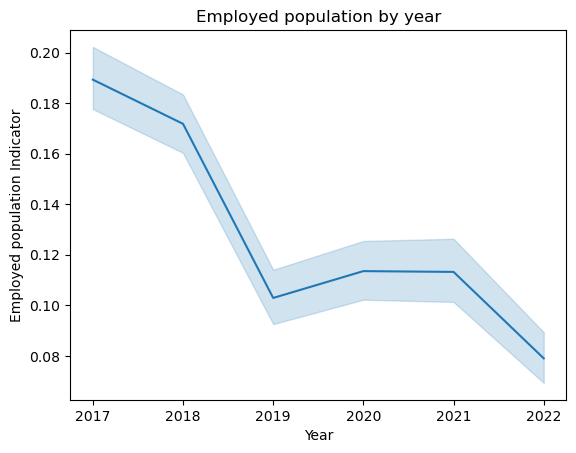

In [49]:
sns.lineplot(x='year', y='employed_population', data=df2)
plt.title("Employed population by year")
plt.xlabel("Year")
plt.ylabel("Employed population Indicator")
plt.show;

In [52]:
df5.head(1)

,economic_dynamism,government_efficiency,infrastructure,resiliency,PCA1,PCA2,PCA3,PCA4,city_municipality,province,longitude,latitude,geometry,FID,year
0,0.44069,1.0519,0.57588,1.596444,1.183885,-0.702319,0.00855,-0.053532,Aborlan,Palawan,118.548417,9.437101,MULTIPOLYGON (((118.57997900000032 9.372150000...,0,2017


In [50]:
def map_ph(data, year, name):
    cond = (data['year'] == year) & (data['country'] == name)

    lat = data[cond]['latitude'].tolist()
    lon = data[cond]['longitude'].tolist()
    nam = data[cond]['city_municipality'].tolist()
    eco = data[cond]['economic_dynamism'].tolist()
    gov = data[cond]['government_efficiency'].tolist()
    inf = data[cond]['infrastructure'].tolist()
    res = data[cond]['resiliency'].tolist()
    yea = data[cond]['year'].tolist()

    html = '''<h4>Needs Assessment Information</h4>
    <b>Name: %s</b> <br /><br />
    <b>economic_dynamism: </b> %s <br />
    <b>government_efficiency: </b> %s <br />
    <b>infrastructure: </b> %s <br />
    <b>resiliency: </b> %s <br />
    '''

    map = flm.Map(location=[lat[0], lon[0]], zoom_start=6, scrollWheelZoom=False)

    fg = flm.FeatureGroup(name='Philippines Map')

    for lt, ln, nm, ec, go, nf, re, ye in zip((lat), (lon), (nam), (eco), (gov), (inf), (res), (yea)):
        sum_values = ec + go + nf + re

        def marker_size(sums):
            marker_sized = 0
            if sums > 0:
                marker_sized = (10 - sums) + 5
            return int(marker_sized)

        def marker_color(sums):
            norm = colors.Normalize(vmin=-1, vmax=4)
            cmap = cm.get_cmap('YlOrRd')
            marker_colored = cmap(norm(sums))
            return colors.to_hex(marker_colored, keep_alpha=False)

        iframe = flm.IFrame(html = html % ((nm), round((ec), 2), round((go), 2), round((nf), 2), round((re), 2)), height = 165)
        popup = flm.Popup(iframe, min_width=200, max_width=500)
        fg.add_child(flm.CircleMarker(location = [lt, ln], popup = (popup), fill_color=marker_color(sum_values), color='None', radius=marker_size(sum_values), fill_opacity = 0.7))
        map.add_child(fg)
        print(sum_values)
        print(marker_size(sum_values))
    map.save('map.html')
    return map

In [123]:
import folium as flm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

def map_ph(data, year, name):
    cond = (data['year'] == year) & (data['country'] == name)

    lat = data[cond]['latitude'].tolist()
    lon = data[cond]['longitude'].tolist()
    nam = data[cond]['city_municipality'].tolist()
    eco = data[cond]['economic_dynamism'].tolist()
    gov = data[cond]['government_efficiency'].tolist()
    inf = data[cond]['infrastructure'].tolist()
    res = data[cond]['resiliency'].tolist()
    yea = data[cond]['year'].tolist()

    html = '''<h4>Needs Assessment Information</h4>
    <b>Name: %s</b> <br /><br />
    <b>economic_dynamism: </b> %s <br />
    <b>government_efficiency: </b> %s <br />
    <b>infrastructure: </b> %s <br />
    <b>resiliency: </b> %s <br />
    <b>Year: </b> %s
    '''
    zoom = 8
    zoom_start = 6
    zoom_end = 20

    map = flm.Map(location=[lat[0], lon[0]], zoom_start=zoom_start, zoom_end=zoom_end)

    fg = flm.FeatureGroup(name='Philippines Map')

    for lt, ln, nm, ec, go, nf, re, ye in zip((lat), (lon), (nam), (eco), (gov), (inf), (res), (yea)):
        sum_values = ec + go + nf + re

        def marker_size(sums):
            marker_sized = 0
            if sums > 0:
                marker_sized = ((10 - sums) + 10) * (zoom - zoom_start) / (zoom_end - zoom_start)
            return int(marker_sized)

        def marker_color(sums):
            norm = colors.Normalize(vmin=-1, vmax=4)
            cmap = cm.get_cmap('YlOrRd')
            marker_colored = cmap(norm(sums))
            return colors.to_hex(marker_colored, keep_alpha=False)

        iframe = flm.IFrame(html = html % ((nm), (ec), (go), (nf), (re), (ye)), height = 165)
        popup = flm.Popup(iframe, min_width=200, max_width=500)
        fg.add_child(flm.CircleMarker(location = [lt, ln], popup = (popup), fill_color=marker_color(sum_values), color='None', radius=marker_size(sum_values), fill_opacity = 0.7))
        map.add_child(fg)
        print(sum_values)
        print(marker_size(sum_values))
    map.save('map.html')
    return map


In [113]:
def map_ph(data, year, name):
    cond = (data['year'] == year) & (data['country'] == name)

    lat = data[cond]['latitude'].tolist()
    lon = data[cond]['longitude'].tolist()
    nam = data[cond]['city_municipality'].tolist()
    eco = data[cond]['economic_dynamism'].tolist()
    gov = data[cond]['government_efficiency'].tolist()
    inf = data[cond]['infrastructure'].tolist()
    res = data[cond]['resiliency'].tolist()
    yea = data[cond]['year'].tolist()

    html = '''<h4>Needs Assessment Information</h4>
    <b>Name: %s</b> <br /><br />
    <b>economic_dynamism: </b> %s <br />
    <b>government_efficiency: </b> %s <br />
    <b>infrastructure: </b> %s <br />
    <b>resiliency: </b> %s <br />
    <b>Year: </b> %s
    '''


    map = flm.Map(location=[lat[0], lon[0]], zoom_start=6, zoom_control=True, zoom_end=20, scrollWheelZoom=False)

    zoom_start = 6
    zoom_end = 20

    fg = flm.FeatureGroup(name='Philippines Map')

    for lt, ln, nm, ec, go, nf, re, ye in zip((lat), (lon), (nam), (eco), (gov), (inf), (res), (yea)):
        sum_values = ec + go + nf + re

        def marker_size(sums, zoom):
            marker_sized = 0
            if sums > 0:
                marker_sized = (10 - sums) + 10
            marker_sized = marker_sized * zoom / 12
            return int(marker_sized)

        def marker_color(sums):
            norm = colors.Normalize(vmin=0, vmax=10)
            cmap = cm.get_cmap('YlOrRd')
            marker_colored = cmap(norm(sums))
            return marker_colored

        iframe = flm.IFrame(html = html % ((nm), (ec), (go), (nf), (re), (ye)), height = 165)
        popup = flm.Popup(iframe, min_width=200, max_width=500)
        # marker = flm.CircleMarker(location = [lt, ln], popup = (popup), fill_color=marker_color(sum_values), color='None', radius=marker_size(sum_values, map.zoom_level), fill_opacity = 0.7)
        # marker.add_child(flm.Popup(html = html % ((nm), (ec), (go), (nf), (re), (ye)), min_width=200, max_width=500))
        fg.add_child(flm.CircleMarker(location = [lt, ln], popup = (popup), fill_color=marker_color(sum_values), color='None', radius=marker_size(sum_values, zoom_end), fill_opacity = 0.7))
        map.add_child(fg)
        print(sum_values)
        print(marker_size(sum_values))
    map.save('map.html')
    return map

In [51]:
map_ph(df5, 2020, 'philippines')

3.2279744444444445
11
3.5089388888888893
11
4.120022222222222
10
3.738424444444444
11
3.7205077777777777
11
3.485231111111111
11
3.7435311111111114
11
3.9339399999999998
11
3.783272222222222
11
3.557901111111111
11
4.273221111111111
10
3.7888488888888894
11
3.186574444444444
11
2.4981866666666663
12
3.5079366666666676
11
2.4415177777777775
12
3.832082222222222
11
4.0134
10
3.745247777777778
11
4.261493333333333
10
3.952098888888888
11
3.395471111111111
11
2.23244
12
3.726622222222222
11
4.254395555555556
10
3.8309699999999998
11
4.005407777777777
10
3.2210755555555552
11
3.518642222222222
11
3.8753622222222224
11
3.8137444444444446
11
4.106723333333334
10
4.1496933333333335
10
3.3015444444444446
11
3.2681355555555553
11
4.154812222222223
10
3.215107777777778
11
3.846595555555556
11
3.6404755555555557
11
3.5280411111111114
11
3.3928077777777776
11
4.149477777777777
10
3.831045555555556
11
4.217845555555556
10
4.140757777777777
10
3.030952222222222
11
4.0311144444444444
10
3.64665
11
3.8